In [1]:
import uproot
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from analysis import Optimization

In [19]:
babies = glob.glob("../analysis/studies/onelep/output/Run2/*.root")
babies = [baby for baby in babies if "data" not in baby]
babies

['../analysis/studies/onelep/output/Run2/Bosons.root',
 '../analysis/studies/onelep/output/Run2/WJets.root',
 '../analysis/studies/onelep/output/Run2/SingleTop.root',
 '../analysis/studies/onelep/output/Run2/TTbar2L.root',
 '../analysis/studies/onelep/output/Run2/VH.root',
 '../analysis/studies/onelep/output/Run2/TTX.root',
 '../analysis/studies/onelep/output/Run2/TTbar1L.root',
 '../analysis/studies/onelep/output/Run2/VBSWH_mkW.root']

In [3]:
vbswh = Optimization(
    sig_root_files=babies[-1:],
    bkg_root_files=babies[:-1],
    ttree_name="tree",
    weight_columns=["xsec_sf"]
)

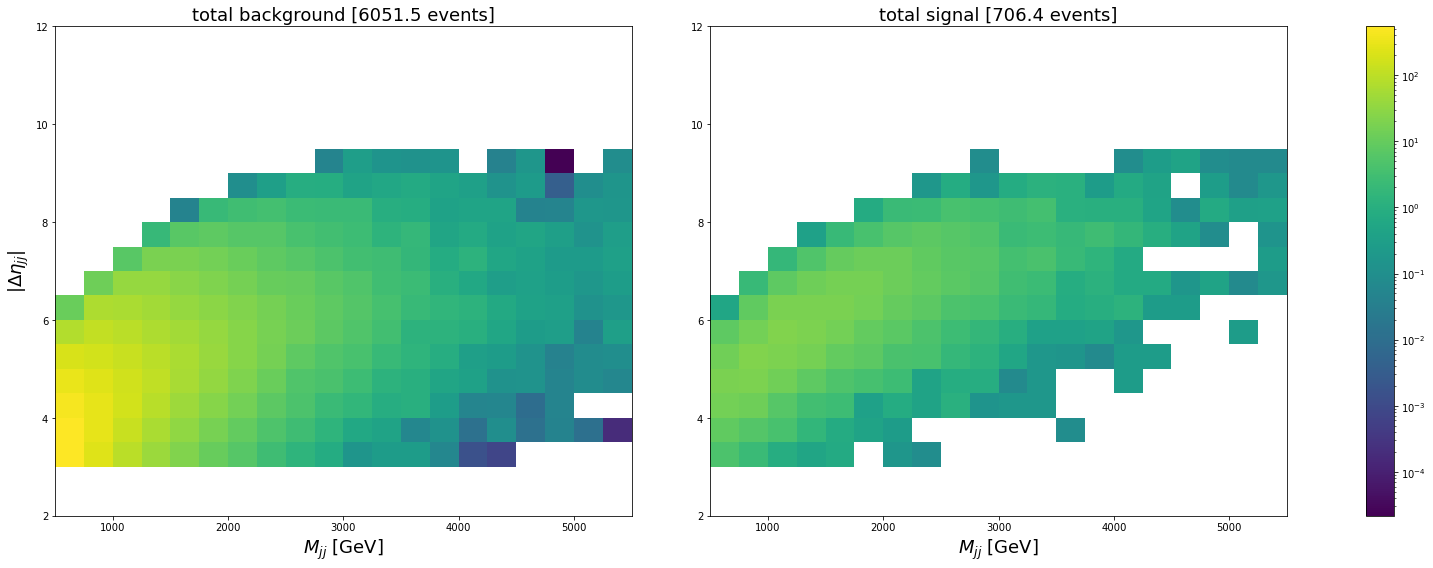

In [4]:
vbswh.plot_sig_vs_bkg_2D(
    "M_jj", "deta_jj", np.linspace(500, 5500, 21), np.linspace(2, 12, 21), 
    xabs=False, yabs=True, x_label="$M_{jj}$ [GeV]", y_label="$|\Delta\eta_{jj}|$", logz=True
);

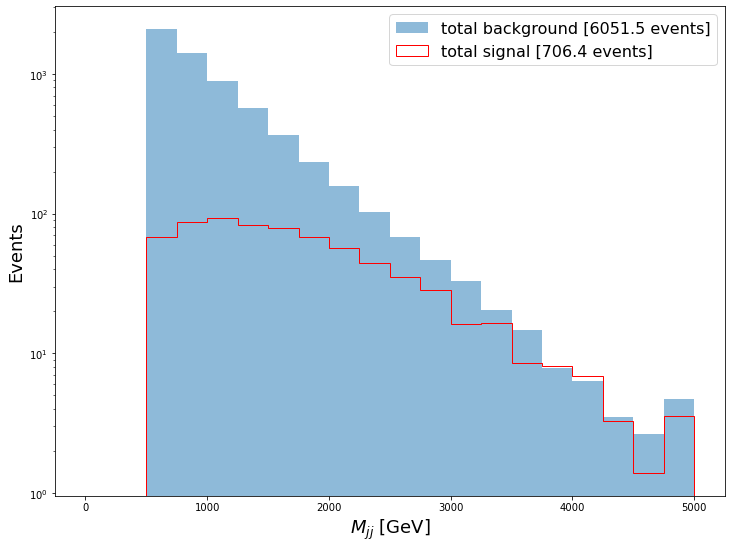

In [5]:
vbswh.plot_sig_vs_bkg("M_jj", np.linspace(0, 5000, 21), x_label="$M_{jj}$ [GeV]", logy=True);

In [6]:
vbswh.fom_scan("M_jj", [1000, 1500, 2000, 2500], operator=">", base_selection="")

sel,sig,bkg,fom
M_jj > 1000,551.3172892853618,2523.9264836514844,10.973957193226422
M_jj > 1500,375.25336518883705,1067.0527784071464,11.48766189977537
M_jj > 2000,229.02518039941788,468.01883460744796,10.58647968530647
M_jj > 2500,127.68839940428734,207.56104553915395,8.862954468253008


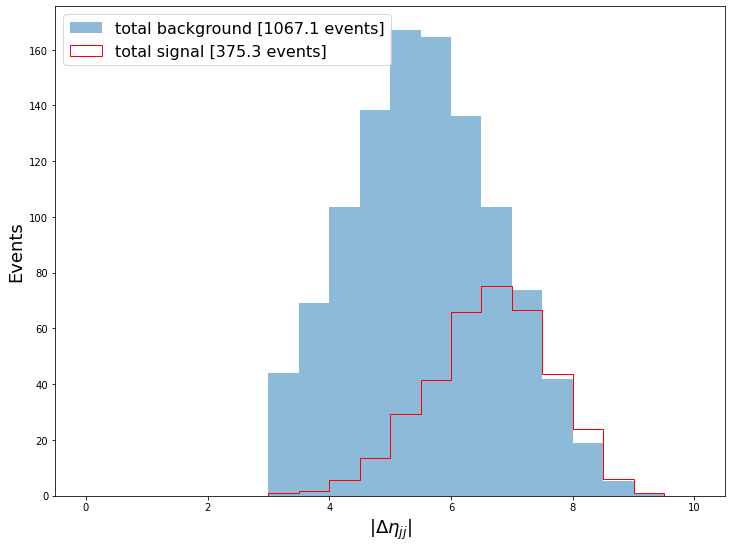

In [7]:
vbswh.plot_sig_vs_bkg(
    "deta_jj", np.linspace(0, 10, 21), 
    selection="M_jj > 1500", 
    x_label="$|\Delta\eta_{jj}|$",
    abs=True
);

In [8]:
vbswh.fom_scan(
    "deta_jj", [3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7], operator=">", 
    base_selection="M_jj > 1500", abs=True
)

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 3.5,374.30202021449804,1023.1308496041283,11.70190535570842
M_jj > 1500 and abs(deta_jj) > 4,372.7887040898204,954.0993839098855,12.06885130497178
M_jj > 1500 and abs(deta_jj) > 4.5,367.086959823966,850.5365044302225,12.587007129265544
M_jj > 1500 and abs(deta_jj) > 5,353.6368075236678,712.325506687366,13.250071244941788
M_jj > 1500 and abs(deta_jj) > 5.5,324.3006110712886,544.8601362267598,13.89329475627696
M_jj > 1500 and abs(deta_jj) > 6,282.66235895454884,380.29831358561154,14.494584794354687
M_jj > 1500 and abs(deta_jj) > 6.5,216.6204082891345,244.11280387262326,13.864496119680043
M_jj > 1500 and abs(deta_jj) > 7,141.31903424859047,140.68569152936487,11.914496555352454


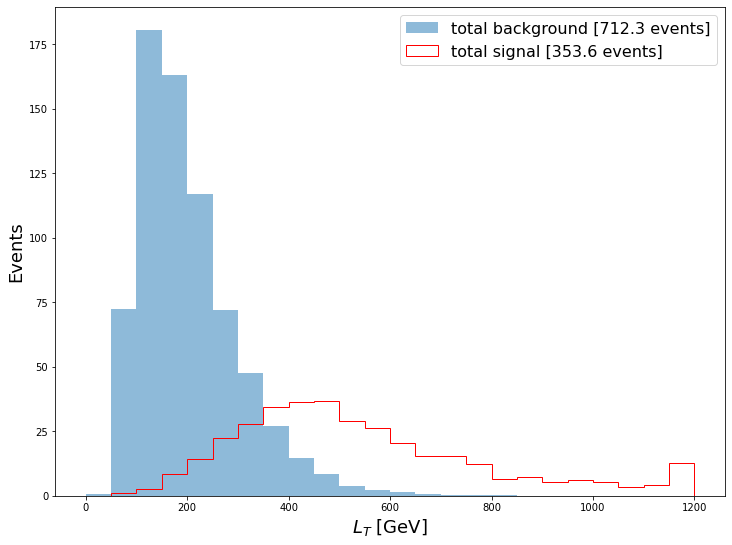

In [9]:
vbswh.plot_sig_vs_bkg(
    "LT", np.linspace(0, 1200, 25), 
    selection="M_jj > 1500 and abs(deta_jj) > 5", x_label="$L_T$ [GeV]"
);

In [10]:
vbswh.fom_scan(
    "LT", [500, 600, 700, 800, 900, 1000, 1100, 1200], operator=">", 
    base_selection="M_jj > 1500 and abs(deta_jj) > 5"
);

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 5 and LT > 500,169.59201911091805,9.497011776898262,55.03157247100027
M_jj > 1500 and abs(deta_jj) > 5 and LT > 600,114.3338014408946,3.2042777502658737,63.87186044063557
M_jj > 1500 and abs(deta_jj) > 5 and LT > 700,78.36970856040716,1.0846055212750798,75.2510087821831
M_jj > 1500 and abs(deta_jj) > 5 and LT > 800,50.74911180883646,0.49770336963410955,71.93548155897788
M_jj > 1500 and abs(deta_jj) > 5 and LT > 900,36.9077812358737,0.17664103301649448,87.81569439329631
M_jj > 1500 and abs(deta_jj) > 5 and LT > 1000,25.593215852975845,0.11302476255514193,76.12688471865924
M_jj > 1500 and abs(deta_jj) > 5 and LT > 1100,16.57958146929741,0.0740480379172368,60.92798079472881
M_jj > 1500 and abs(deta_jj) > 5 and LT > 1200,10.812531277537346,0.07257327034312766,40.13645670254213


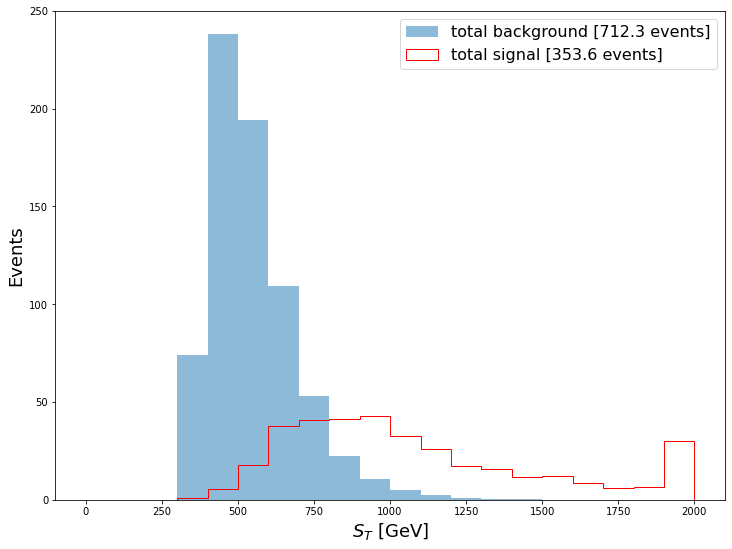

In [11]:
axes = vbswh.plot_sig_vs_bkg(
    "ST", np.linspace(0, 2000, 21), 
    selection="M_jj > 1500 and abs(deta_jj) > 5", x_label="$S_T$ [GeV]"
);
axes.set_ylim(ymin=0);

In [12]:
vbswh.fom_scan(
    "ST", [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1650, 1700, 1800], operator=">", 
    base_selection="M_jj > 1500 and abs(deta_jj) > 5"
)

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1000,167.04788180440664,9.617859183055089,53.8643924860806
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1100,134.6696458235383,4.547594292597978,63.150800720924714
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1200,108.49874064326286,2.173486760861124,73.59464212020374
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300,91.2031073346734,1.1624551957611402,84.59048669910995
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1400,75.48758988827467,0.5815202354751818,98.99041476001902
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1500,63.756481289863586,0.1970987939130282,143.6092311274264
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1600,51.422478549182415,0.12654388371447567,144.55476969801518
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1650,47.19832204282284,0.12317968999559525,134.47978491572172
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1700,42.58208729326725,0.0663988350861473,165.2519967789448
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1800,36.404159277677

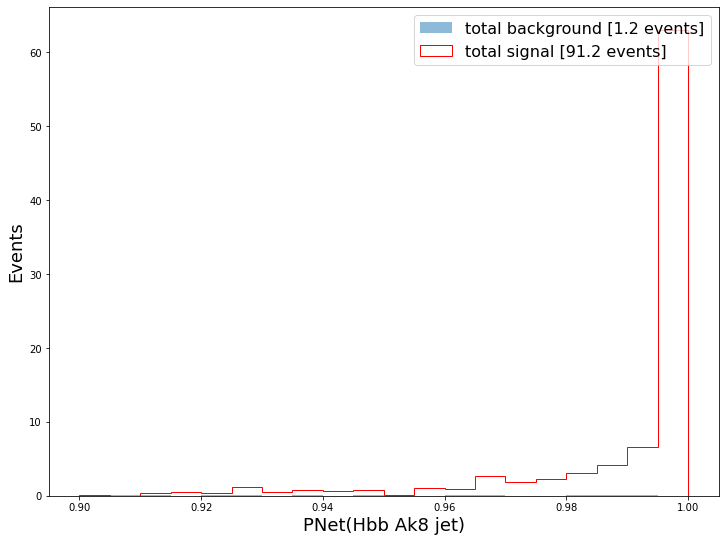

In [13]:
vbswh.plot_sig_vs_bkg(
    "hbbjet_score", np.linspace(0.9, 1.0, 21), 
    selection="M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300", 
    x_label="PNet(Hbb Ak8 jet)"
);

In [14]:
vbswh.fom_scan(
    "hbbjet_score", np.linspace(0.91, 0.99, 9), operator=">", 
    base_selection="M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300"
)

sel,sig,bkg,fom
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.91,91.13031930476427,1.0675561474454298,88.19978553218934
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.92,90.19070874899626,1.0158948649004742,89.48235744760778
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.93,88.53266457468271,0.731671792727866,103.50119859180114
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.9400000000000001,87.3074191659689,0.6275293760518252,110.21332889631708
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.95,85.84963938593864,0.5073817505435727,120.52331098233829
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.96,84.66267863661051,0.46769148455859977,123.79761377933276
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.97,81.04370374977589,0.3529718197278271,136.41095939469767
M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300 and hbbjet_score > 0.98,76.8822427913

In [15]:
def lepton_charge_plot(vbswh, selection=None):
    fig, axes = plt.subplots(figsize=(12, 9))

    bkg_df = vbswh.bkg_df(selection=selection)
    sig_df = vbswh.sig_df(selection=selection)

    bkg_counts, _, _ = axes.hist(
        (bkg_df.lep_pdgID > 0).astype(int),
        bins=[0, 1, 2],
        alpha=0.5,
        weights=np.ones(len(bkg_df))/len(bkg_df),
        label=f"total background [{bkg_df.event_weight.sum():0.1f}]"
    );
    axes.text(0.5, bkg_counts[0]+0.01, f"{bkg_counts[0]:0.2f}", size=16, ha="center")
    axes.text(1.5, bkg_counts[1]+0.01, f"{bkg_counts[1]:0.2f}", size=16, ha="center")

    sig_counts, _, _ = axes.hist(
        (sig_df.lep_pdgID > 0).astype(int),
        bins=[0, 1, 2],
        histtype="step",
        color="r",
        weights=np.ones(len(sig_df))/len(sig_df),
        label=f"total signal [{sig_df.event_weight.sum():0.1f}]"
    );
    axes.text(0.5, sig_counts[0]+0.01, f"{sig_counts[0]:0.2f}", size=16, ha="center")
    axes.text(1.5, sig_counts[1]+0.01, f"{sig_counts[1]:0.2f}", size=16, ha="center")

    axes.set_ylabel("Events/Total", size=18)
    axes.set_xticks([0.5, 1.5]);
    axes.set_xticklabels(["$\ell^{+}$", "$\ell^{-}$"], size=18);

    axes.legend(fontsize=16);

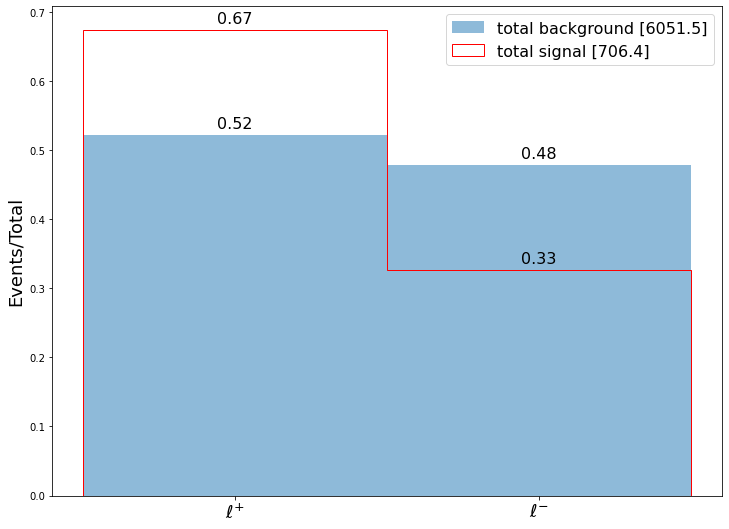

In [16]:
lepton_charge_plot(vbswh)

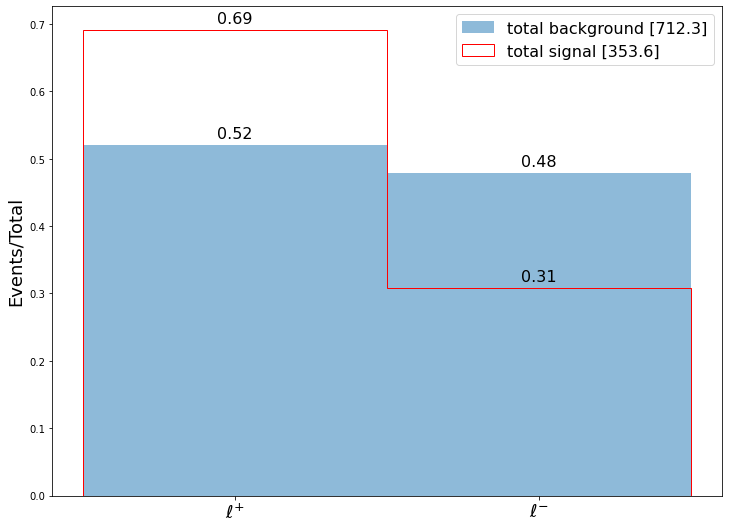

In [17]:
lepton_charge_plot(vbswh, selection="M_jj > 1500 and abs(deta_jj) > 5")

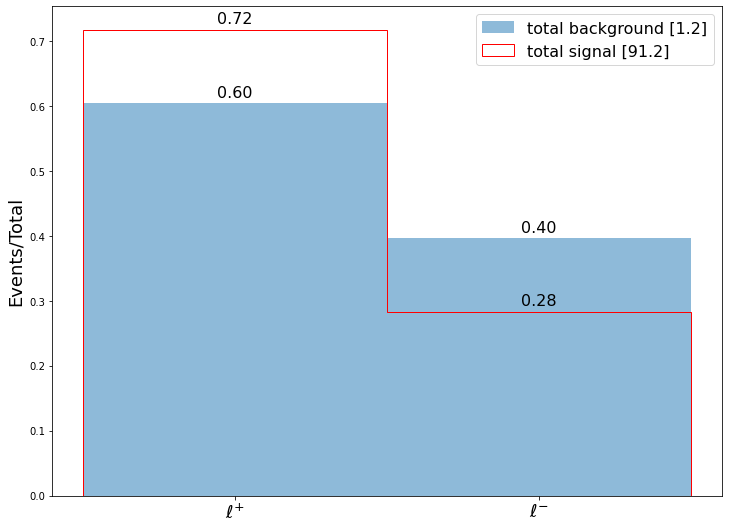

In [18]:
lepton_charge_plot(vbswh, selection="M_jj > 1500 and abs(deta_jj) > 5 and ST > 1300")